# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import config
from joblib import dump, load
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.stats import wilcoxon, kendalltau
from utils import plot_longitudinal, get_diversity

# Compute GMHI2 scores

In [2]:
study = "P89"

In [3]:
gmhi2 = load(os.path.join(config.MODEL_DIR, "gmhi2_model.joblib"))
gmhi2

LogisticRegression(C=0.03, class_weight='balanced', penalty='l1',
                   random_state=42, solver='liblinear')

In [4]:
X = pd.read_csv(os.path.join(config.CLEAN_DIR, "taxonomic_features_val.csv"), index_col=[0, 1]).loc[study]
X.head()

k__Archaea  k__Archaea|p__Euryarchaeota  \
Sample Accession                                            
SAMN17171498        0.001768                     0.001768   
SAMN17171499        0.000000                     0.000000   
SAMN17171500        0.000000                     0.000000   
SAMN17171508        0.094726                     0.094726   
SAMN17171509        0.000000                     0.000000   

                  k__Archaea|p__Euryarchaeota|c__Methanobacteria  \
Sample Accession                                                   
SAMN17171498                                            0.001768   
SAMN17171499                                            0.000000   
SAMN17171500                                            0.000000   
SAMN17171508                                            0.094726   
SAMN17171509                                            0.000000   

                  k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales  \
Sample Accession                                                                         
SAMN17171498                                               0.001768                      
SAMN17171499                                               0.000000                      
SAMN17171500                                               0.000000                      
SAMN17171508                                               0.094726                      
SAMN17171509                                               0.000000                      

                  k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae  \
Sample Accession                                                                                                
SAMN17171498                                               0.001768                                             
SAMN17171499                                               0.000000                                             
SAMN17171500                                               0.000000                                             
SAMN17171508                                               0.094726                                             
SAMN17171509                                               0.000000                                             

                  k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter  \
Sample Accession                                                                                                                      
SAMN17171498                                               0.001768                                                                   
SAMN17171499                                               0.000000                                                                   
SAMN17171500                                               0.000000                                                                   
SAMN17171508                                               0.091457                                                                   
SAMN17171509                                               0.000000                                                                   

                  k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii  \
Sample Accession                                                                                                                                                    
SAMN17171498                                               0.001768                                                                                                 
SAMN17171499                                               0.000000                                                                                                 
SAMN17171500                                               0.000000                 

In [5]:
meta = pd.read_csv(os.path.join(config.CLEAN_DIR, "metadata_val.csv"), index_col=[0, 1, 2]).loc[study]
assert((meta.index.get_level_values(0) == X.index).all())
meta["GMHI2"] = gmhi2.decision_function(X > config.PRESENCE_CUTOFF)
meta.index = meta.index.get_level_values(1)
age_and_gender = pd.read_csv(os.path.join(config.RAW_DIR, "raw_validation.csv"), index_col=[0, 12]).loc[study][["Age (Years)", "Gender"]]
meta = pd.concat([meta, age_and_gender], axis=1)
meta.head()

health_status/host_diet timepoint     GMHI2  Age (Years)  Gender
Subject_ID                                                                 
S141                       Healthy        T1  1.683239    55.323751  female
S148                       Healthy        T0  2.680812    39.518138  female
S148                       Healthy        T1  2.248741    39.518138  female
S161                       Healthy        T1  1.566004    64.509240    male
S174                       Healthy        T0  1.348567    31.296372    male

# Compute other indices

In [6]:
meta = get_diversity(meta, X)
meta.head()

health_status/host_diet timepoint     GMHI2  Age (Years)  Gender  \
Subject_ID                                                                    
S141                       Healthy        T1  1.683239    55.323751  female   
S148                       Healthy        T0  2.680812    39.518138  female   
S148                       Healthy        T1  2.248741    39.518138  female   
S161                       Healthy        T1  1.566004    64.509240    male   
S174                       Healthy        T0  1.348567    31.296372    male   

            Species Richness  Shannon Diversity  Simpson Diversity  
Subject_ID                                                          
S141                      61           2.235231           0.254008  
S148                      67           2.116307           0.309148  
S148                      69           2.280313           0.233562  
S161                      57           2.784812           0.098686  
S174                      82           3.103211           0.061892

# Plot stuff now 

In [7]:
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [8]:
meta["timepoint_plot"] = [int(time[1:]) for time in meta["timepoint"]]
meta.head()

health_status/host_diet timepoint     GMHI2  Age (Years)  Gender  \
Subject_ID                                                                    
S141                       Healthy        T1  1.683239    55.323751  female   
S148                       Healthy        T0  2.680812    39.518138  female   
S148                       Healthy        T1  2.248741    39.518138  female   
S161                       Healthy        T1  1.566004    64.509240    male   
S174                       Healthy        T0  1.348567    31.296372    male   

            Species Richness  Shannon Diversity  Simpson Diversity  \
Subject_ID                                                           
S141                      61           2.235231           0.254008   
S148                      67           2.116307           0.309148   
S148                      69           2.280313           0.233562   
S161                      57           2.784812           0.098686   
S174                      82           3.103211           0.061892   

            timepoint_plot  
Subject_ID                  
S141                     1  
S148                     0  
S148                     1  
S161                     1  
S174                     0

In [9]:
timepoints_sorted = sorted(list(meta["timepoint"].unique()), key=lambda x : int(x[1:]))
timepoints_sorted

['T0', 'T1']

In [10]:
indices = ["GMHI2", "Species Richness", "Shannon Diversity", "Simpson Diversity"]

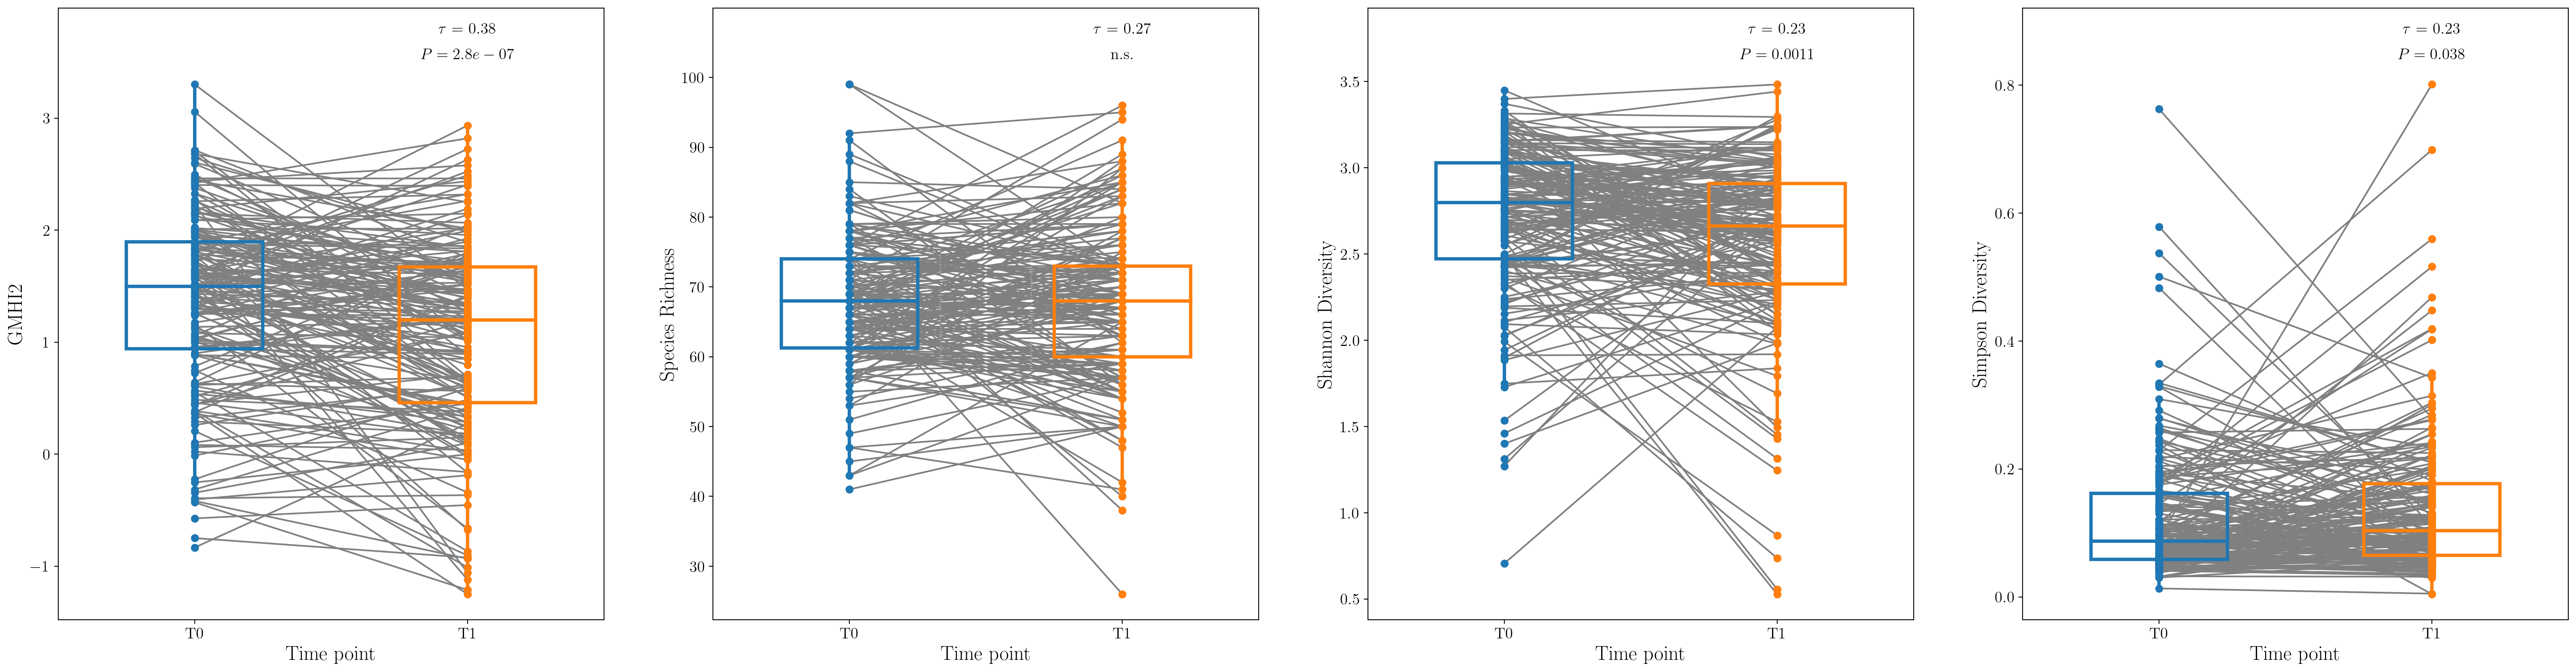

In [11]:
plot_longitudinal(meta, indices, timepoints_sorted, study, show_tau=True)

# Plot by demographic

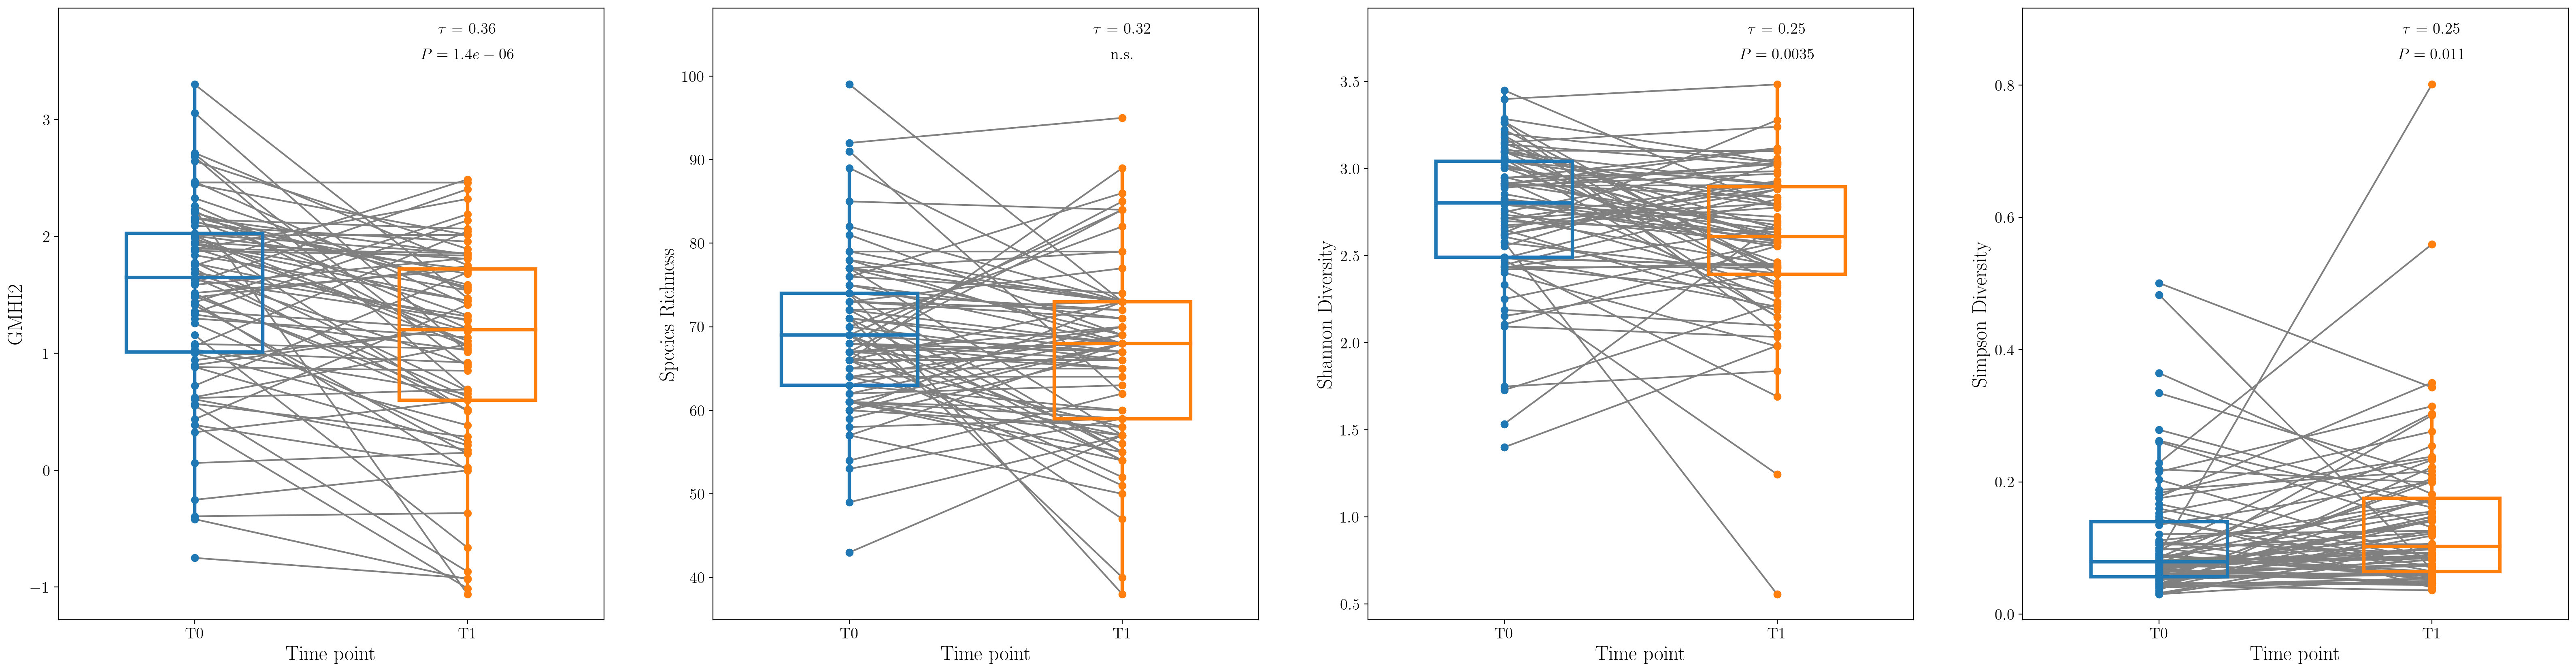

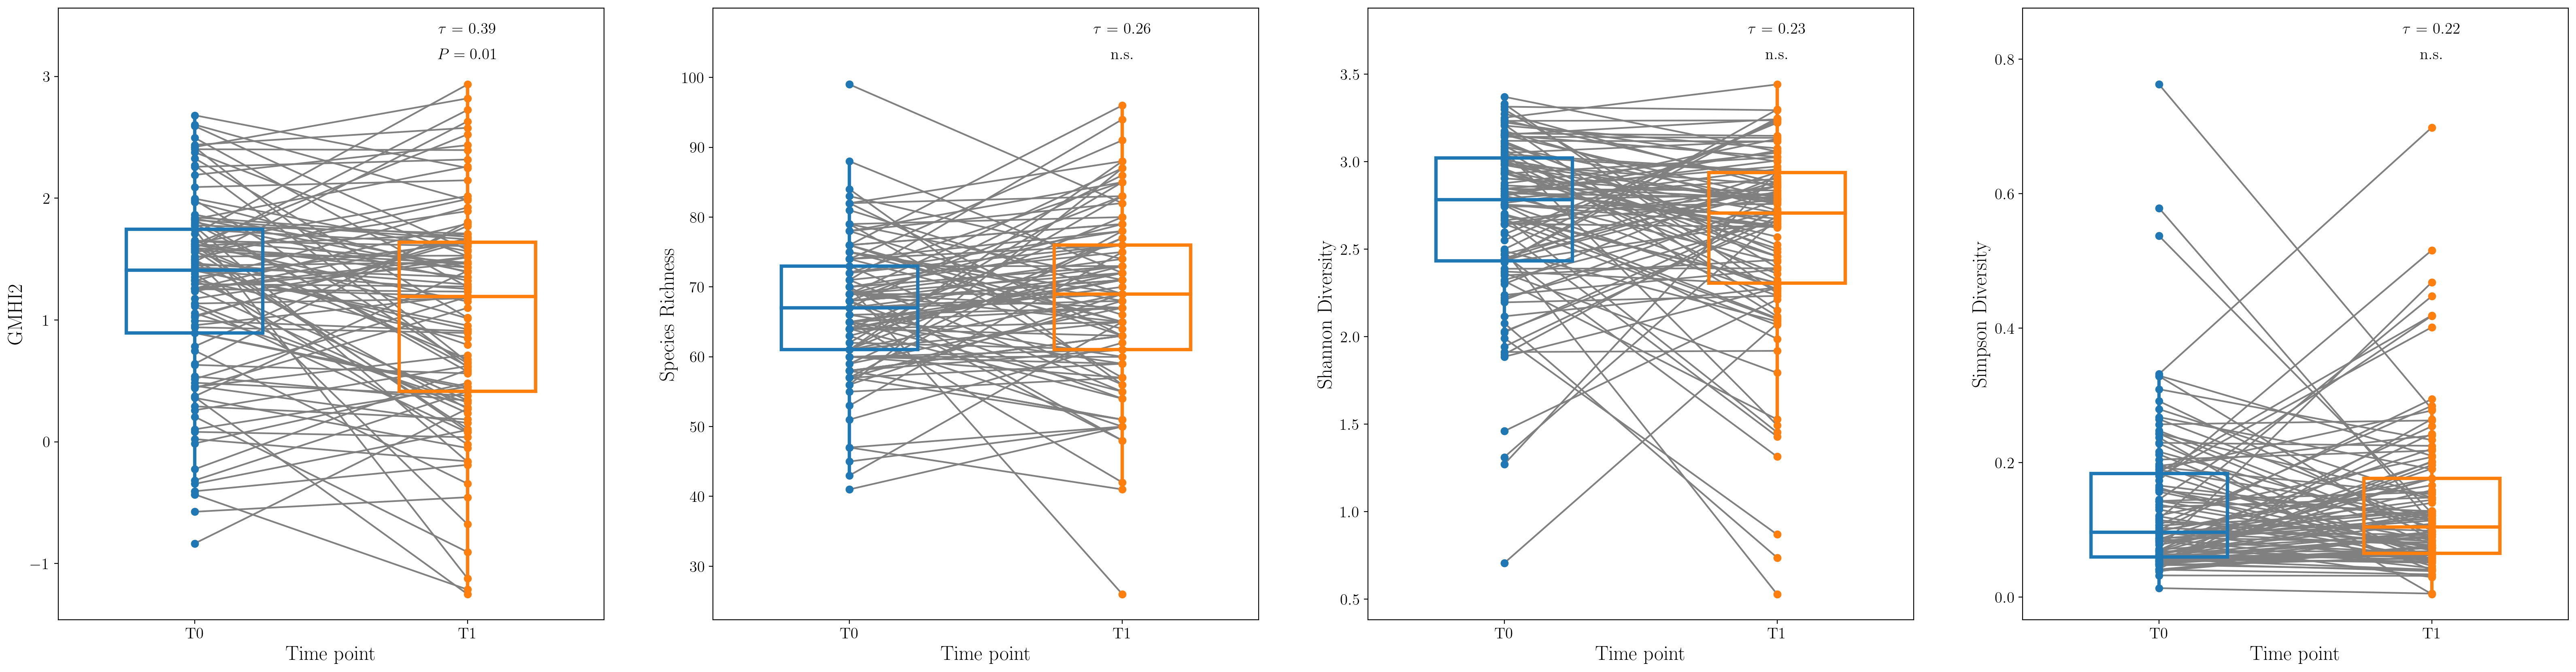

In [12]:
plot_longitudinal(meta[meta["Gender"] == "male"], indices, timepoints_sorted, study + "_male", show_tau=True)
plot_longitudinal(meta[meta["Gender"] == "female"], indices, timepoints_sorted, study + "_female", show_tau=True)

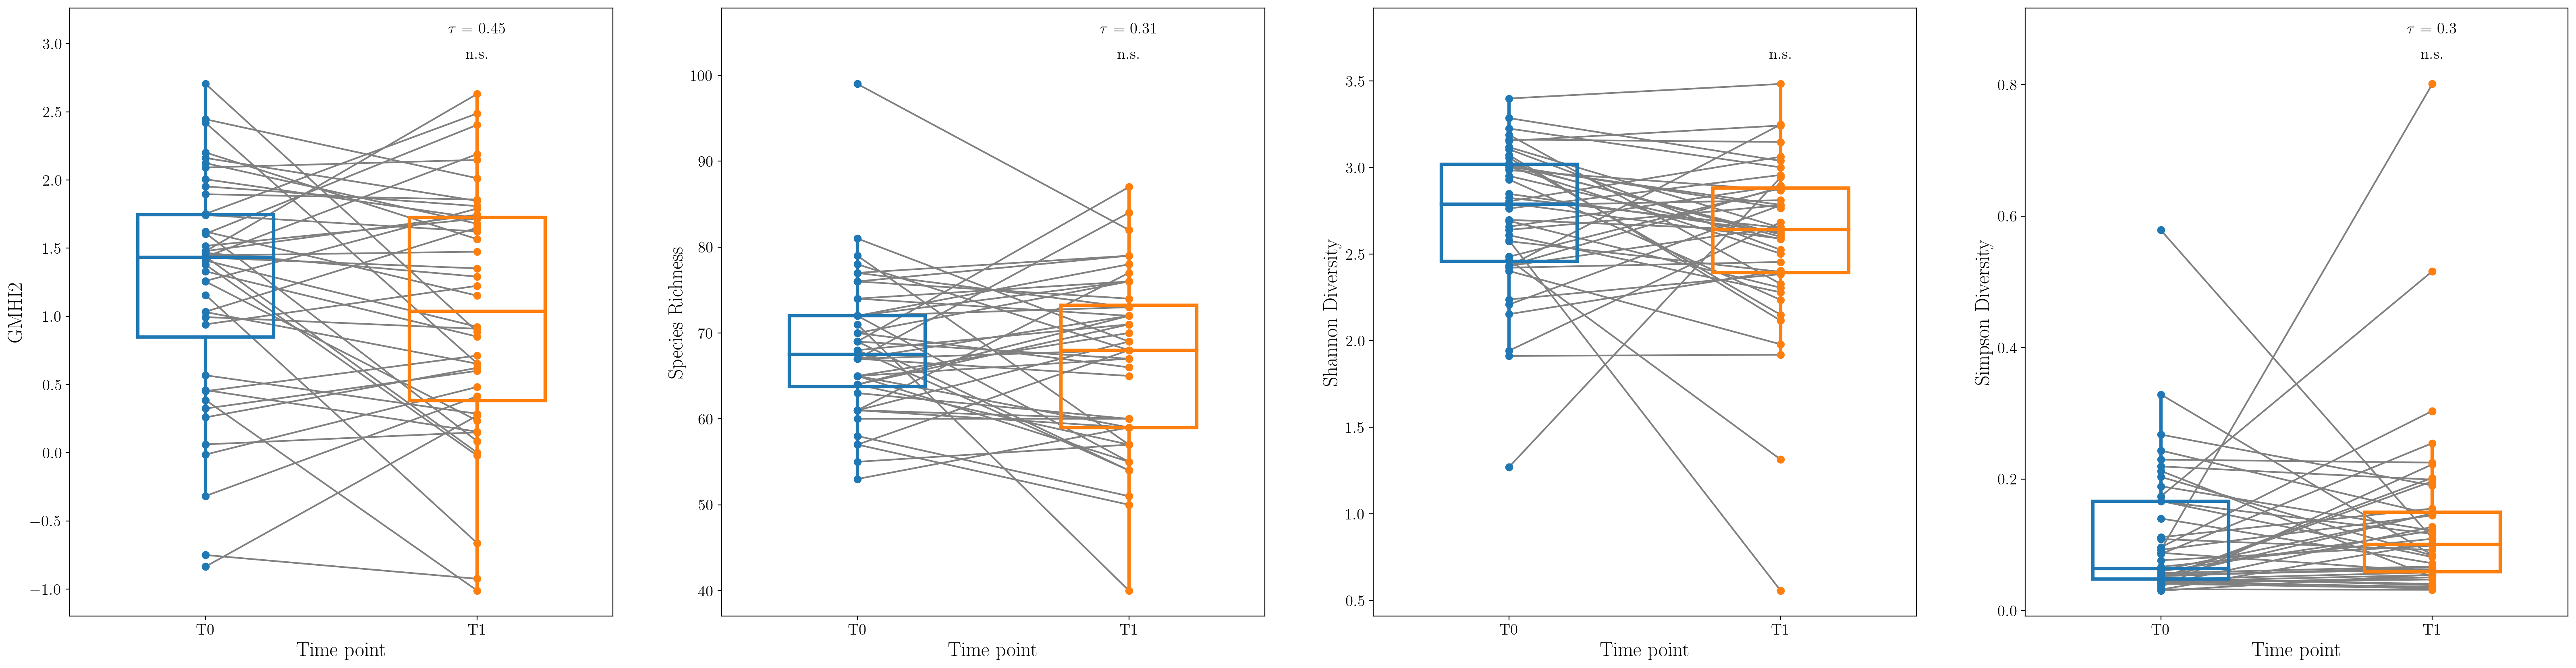

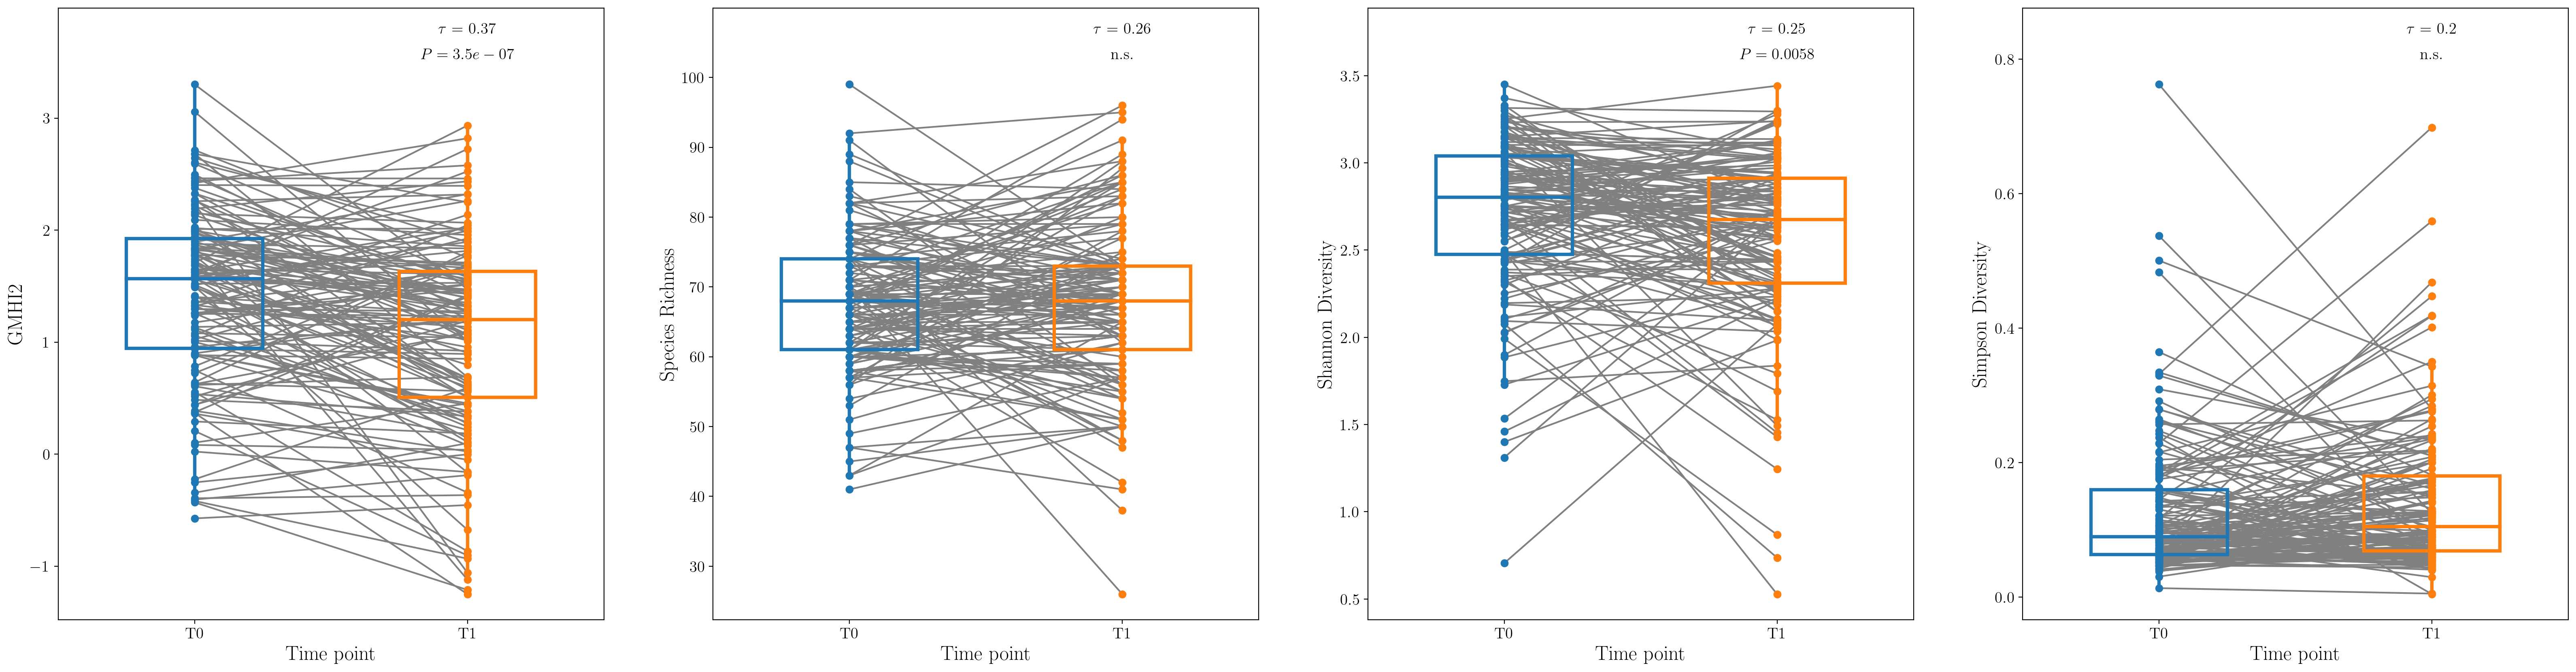

In [13]:
plot_longitudinal(meta[meta["Age (Years)"] >= 60], indices, timepoints_sorted, study + "_elder", show_tau=True)
plot_longitudinal(meta[meta["Age (Years)"] < 60], indices, timepoints_sorted, study + "_nonelder", show_tau=True)